> Yaromir Kapustin

> ver 0.2

> 12.10.2022

## Задача:

Скачать данные из репозитория UCI (для задач регрессии) и подготовить данные для модели:
Подготовить данные для последующей обработки. Для этого мы 
1. Нормализуем все данные. Скалируем все данные в диапозоне от -1 до 1 
2. Обрабатываем пропуски. Обрабатываем выбросы.
3. Строим матрицу корреляции.
4. Строим гистограммы распределения
5. Ищем (взоимозависимые данные).
6. Тест на нормальность


> Датасет представляет собой таблицу excel с данными по недвижимости

---

In [118]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

In [119]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scalerminmax = MinMaxScaler(feature_range=(-1,1)) #нормируем все поля кроме даты и используя minmax скалер преобразуем данные. 

In [120]:
df = pd.read_excel(r"C:\Users\user\Desktop\RE_dataset.xlsx")
to_drop = ['No', 'X1 transaction date'] #сразу выкидываю столбец нумерации и даты транзакции из файла
df.drop(to_drop, inplace=True, axis=1)
columns = df.columns #колонки в список 

In [121]:
scaled_features = scalerminmax.fit_transform(df)
scaled_features

array([[ 0.46118721, -0.98097466,  1.        ,  0.2338827 ,  0.43864568,
        -0.44858963],
       [-0.10958904, -0.91238122,  0.8       ,  0.16989821,  0.42290274,
        -0.37033667],
       [-0.39269406, -0.8333699 ,  0.        ,  0.34246243,  0.51779168,
        -0.27752502],
       ...,
       [-0.14155251, -0.8862777 ,  0.4       ,  0.14299564,  0.43045072,
        -0.39945405],
       [-0.63013699, -0.97480841,  0.        , -0.15971886,  0.44791891,
        -0.18289354],
       [-0.70319635, -0.9792492 ,  0.8       ,  0.02423655,  0.50032349,
         0.02456779]])

In [122]:
#преобразование numpy array после скалирования в pandas DataFrame
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.461187,-0.980975,1.0,0.233883,0.438646,-0.448590
1,-0.109589,-0.912381,0.8,0.169898,0.422903,-0.370337
2,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.277525
3,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.141037
4,-0.771689,-0.886402,0.0,0.146389,0.486306,-0.353958
...,...,...,...,...,...,...
409,-0.374429,0.255641,-1.0,-0.770238,-0.346992,-0.858053
410,-0.744292,-0.979249,0.8,0.024237,0.500323,-0.228389
411,-0.141553,-0.886278,0.4,0.142996,0.430451,-0.399454
412,-0.630137,-0.974808,0.0,-0.159719,0.447919,-0.182894


<AxesSubplot:xlabel='X2 house age', ylabel='Count'>

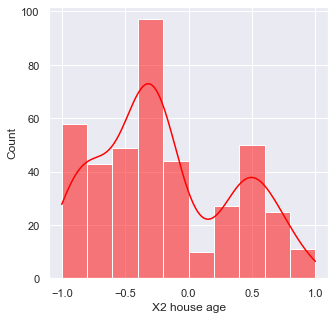

In [123]:
sns.histplot(data=scaled_features_df, x="X2 house age", color="red", label="X2 house age", kde=True)

<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Count'>

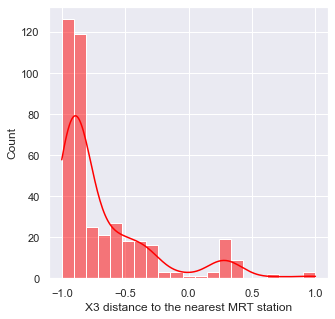

In [124]:
sns.histplot(data=scaled_features_df, x="X3 distance to the nearest MRT station", color="red", label="X3 distance to the nearest MRT station", kde=True)

<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Count'>

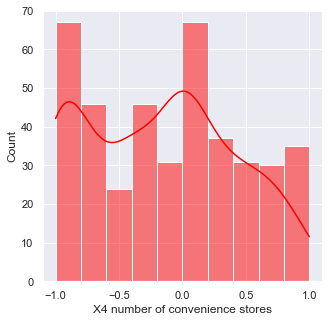

In [125]:
sns.histplot(data=scaled_features_df, x="X4 number of convenience stores", color="red", label="X4 number of convenience stores", kde=True)

<AxesSubplot:xlabel='X5 latitude', ylabel='Count'>

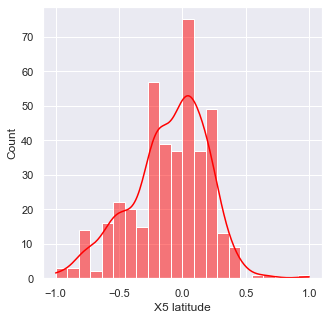

In [126]:
sns.histplot(data=scaled_features_df, x="X5 latitude", color="red", label="X5 latitude", kde=True)

<AxesSubplot:xlabel='X6 longitude', ylabel='Count'>

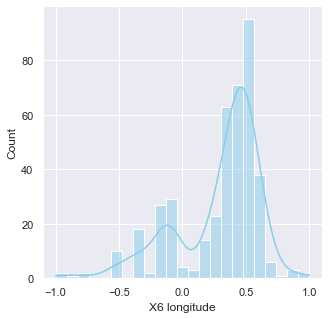

In [127]:
sns.histplot(data=scaled_features_df, x="X6 longitude", color="skyblue", label="X6 longitude", kde=True)

<AxesSubplot:xlabel='Y house price of unit area', ylabel='Count'>

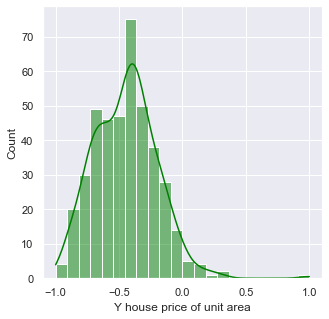

In [128]:
sns.histplot(data=scaled_features_df, x="Y house price of unit area", color="green", label="Y house price of unit area", kde=True)

- Визуально ни одна из гистограм не имеет форму колокола, т.е. не является нормально распределенной.

In [129]:
#удаляем все данные которые не находятся в пределах 3х стандартных отклонений
cleaned_df = scaled_features_df[(np.abs(stats.zscore(scaled_features_df)) < 3).all(axis=1)]

In [130]:
#итого 7 выбросов
cleaned_df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.461187,-0.980975,1.0,0.233883,0.438646,-0.448590
1,-0.109589,-0.912381,0.8,0.169898,0.422903,-0.370337
2,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.277525
3,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.141037
4,-0.771689,-0.886402,0.0,0.146389,0.486306,-0.353958
...,...,...,...,...,...,...
409,-0.374429,0.255641,-1.0,-0.770238,-0.346992,-0.858053
410,-0.744292,-0.979249,0.8,0.024237,0.500323,-0.228389
411,-0.141553,-0.886278,0.4,0.142996,0.430451,-0.399454
412,-0.630137,-0.974808,0.0,-0.159719,0.447919,-0.182894


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Count'>

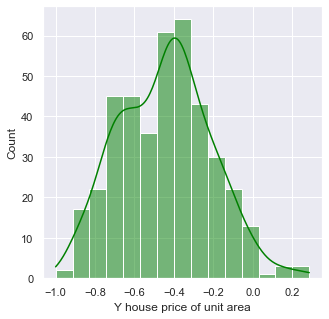

In [131]:
#можно даже визуально наблюдать как гистограмма стала более куполообразной
sns.histplot(data=cleaned_df, x="Y house price of unit area", color="green", label="Y house price of unit area", kde=True)

---
##### Строю тепловую матрицу корреляции с использованием разных методов

In [135]:
corr_matrix = cleaned_df.corr()
corr_matrix

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,-0.007039,0.057119,0.075027,-0.022561,-0.202244
X3 distance to the nearest MRT station,-0.007039,1.000000,-0.618373,-0.631557,-0.769217,-0.691075
X4 number of convenience stores,0.057119,-0.618373,1.000000,0.458272,0.439598,0.604845
X5 latitude,0.075027,-0.631557,0.458272,1.000000,0.408213,0.569685
X6 longitude,-0.022561,-0.769217,0.439598,0.408213,1.000000,0.522886
Y house price of unit area,-0.202244,-0.691075,0.604845,0.569685,0.522886,1.000000


<AxesSubplot:>

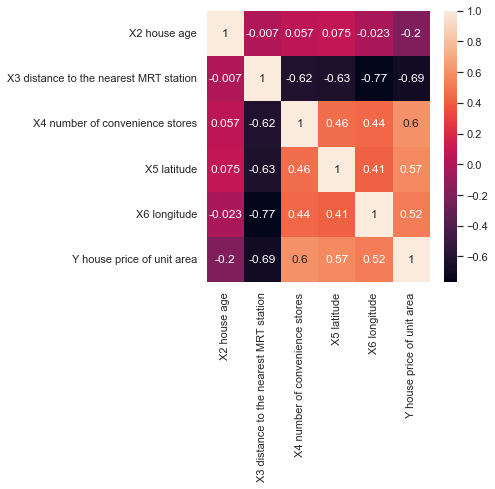

In [140]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(corr_matrix, annot=True)

##### Выводы по матрице корелляции
* Ключевой параметр для сравнения будет "цена за единицу площади". 
* Практически не зависит от даты совершения сделки.
* Широта и долгота сильно влияет на цену. (т.е. расположение)
* Кол-во магазинов рядом также влияет на цену в той же мере. (чем больше, тем дороже)
* Обратная корреляция наблюдается при сравнении расстояния до метро. (чем меньше, тем дороже(что логично))
* Возраст дома в меньшей мере влияет на цену (чем младше дом, тем дороже)

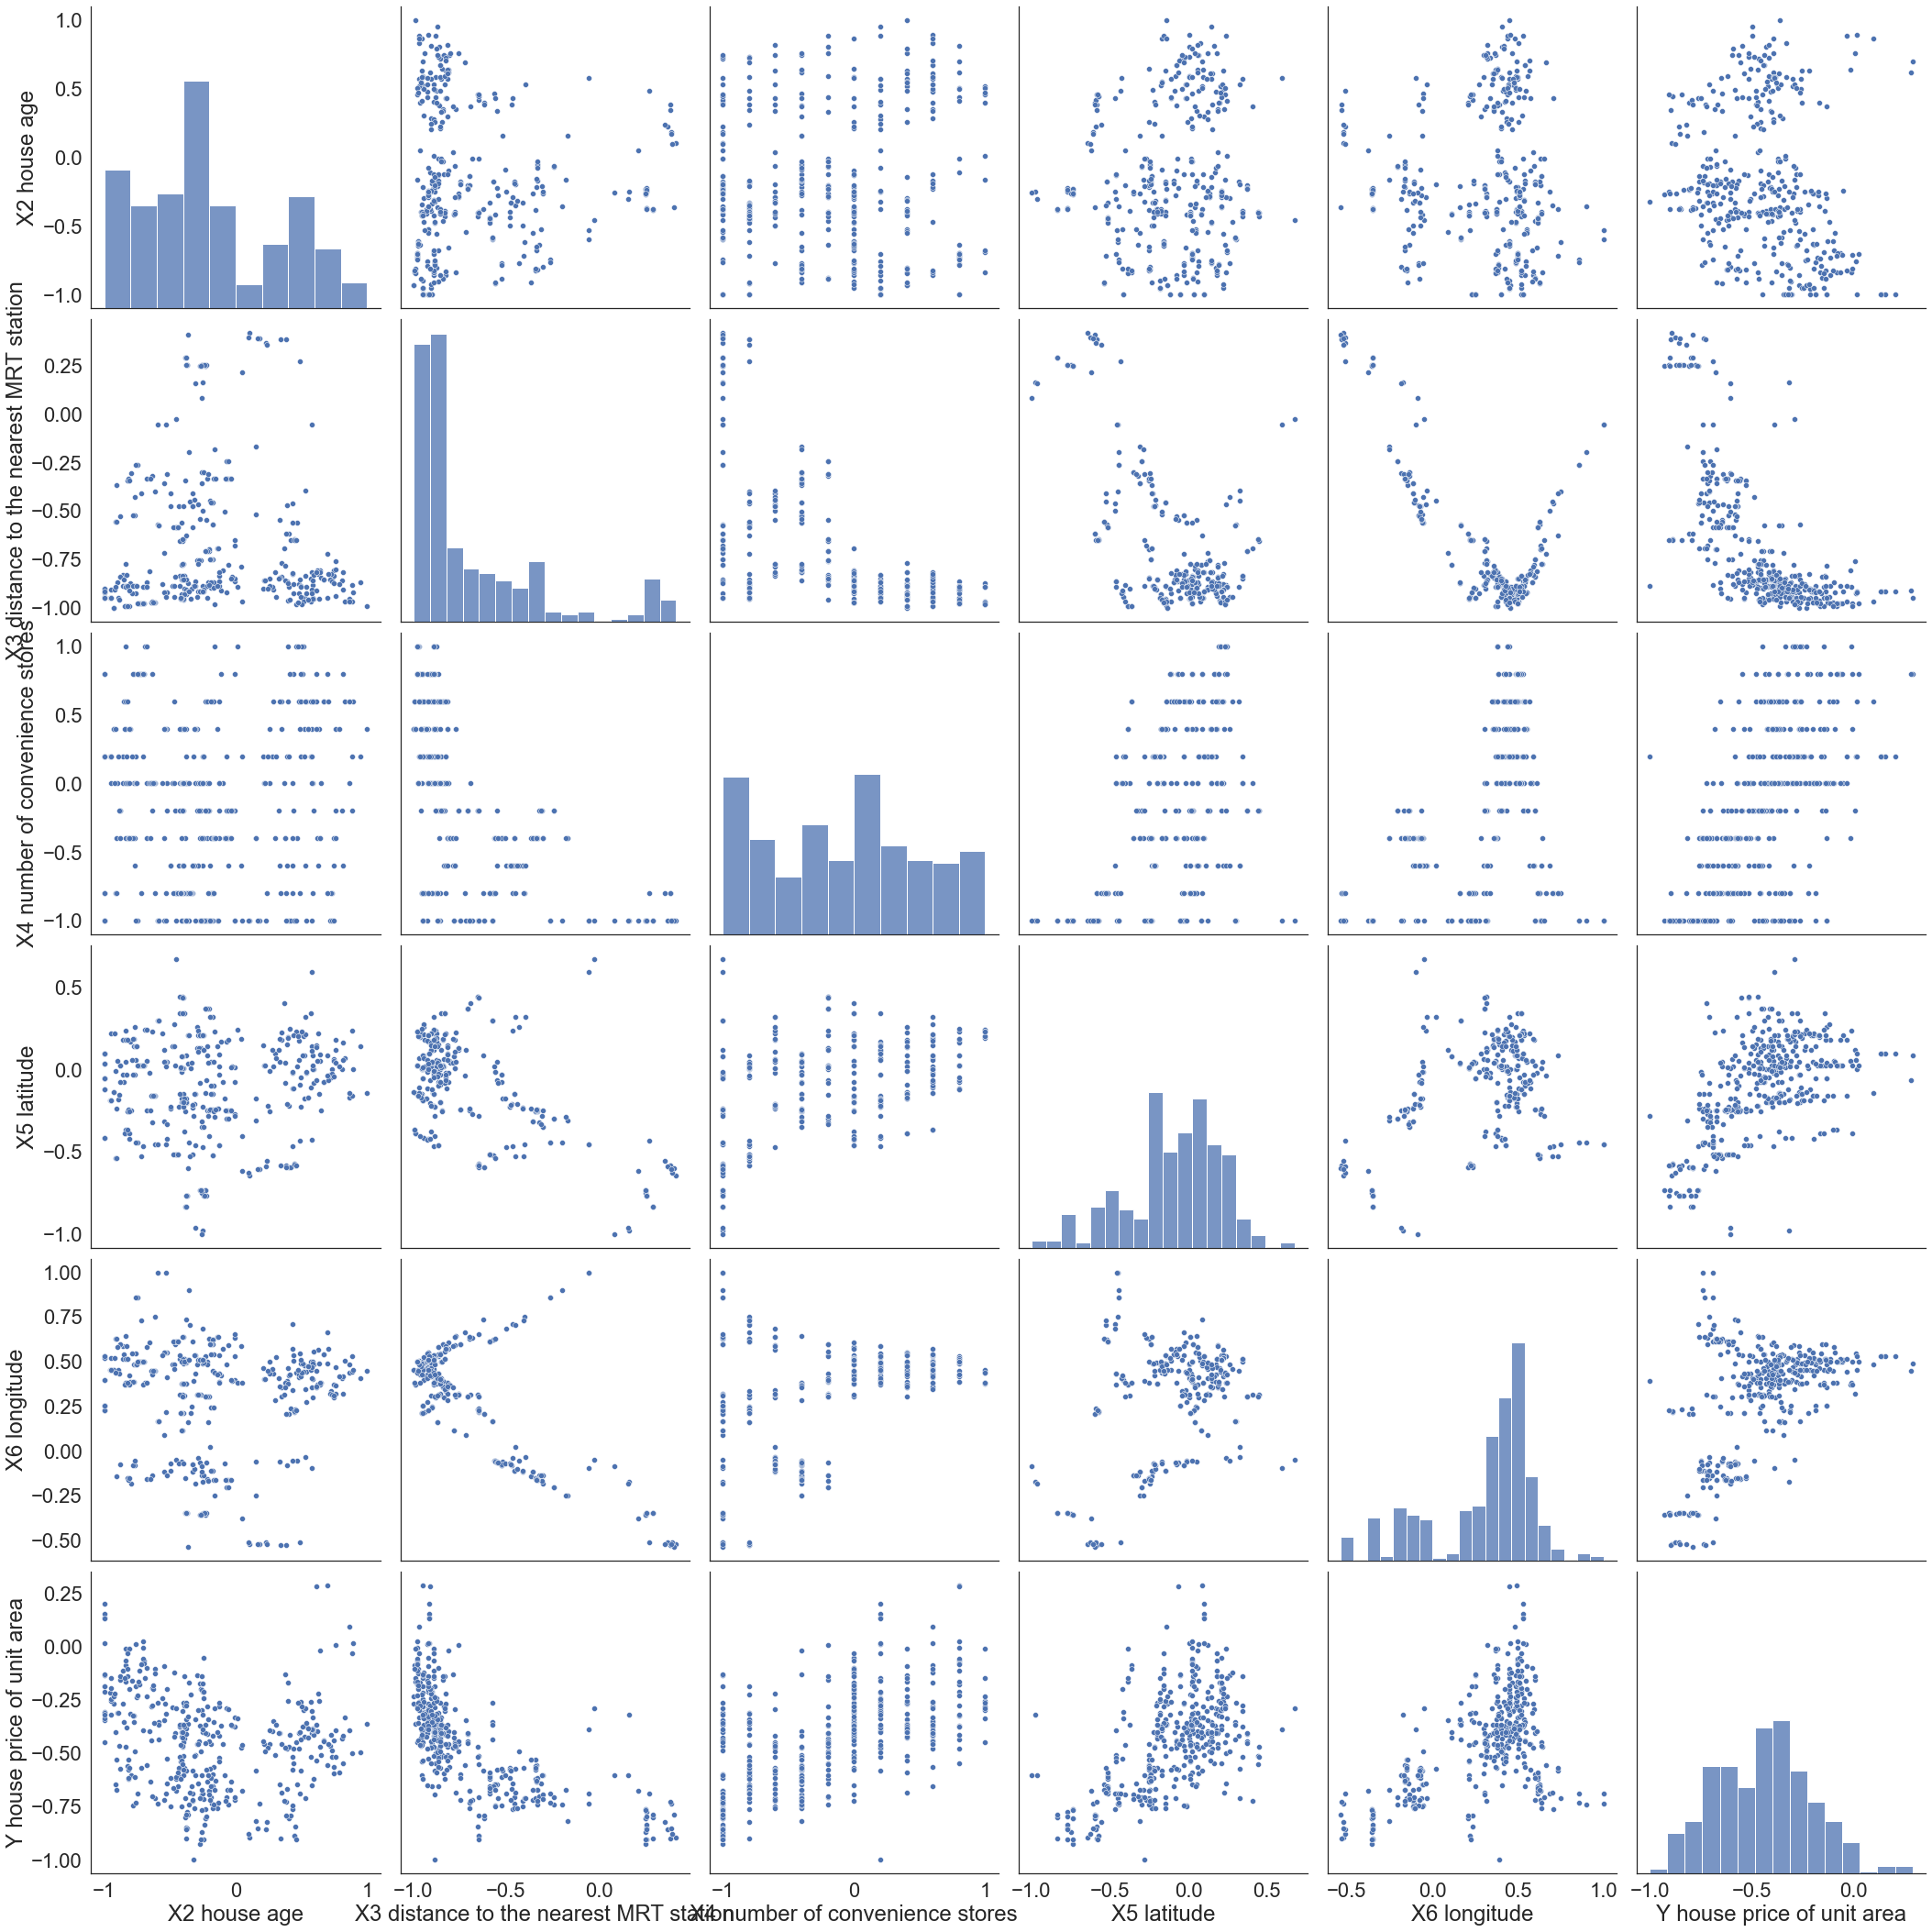

In [150]:
#Парный график позволяет нам увидеть взаимосвязь между двумя переменными. 
sns_plot = sns.pairplot(cleaned_df, height=5.0)

---

In [151]:
#тест на нормальность
from scipy.stats import shapiro 

shapiro(cleaned_df)

ShapiroResult(statistic=0.9624752402305603, pvalue=1.1052146385981733e-24)

##### Поскольку p-значение меньше 0.05, это означает, что данные выборки не относятся к нормальному распределению.